<a href="https://colab.research.google.com/github/MilaPost/Statistic_python/blob/main/DAU_88_%D0%9F%D0%BE%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0_%D0%9B_%D0%B4%D0%B7_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("german_used_cars.csv")

Описание данных в датафрейме

* **Brand:** The brand or manufacturer of the car.
* **Model:** The specific model of the car.
* **Color:** The color of the car's exterior.
* **Registration Date:** The date when the car was registered (Month/Year).
* **Year of Production:** The year in which the car was manufactured.
* **Price in Euro:** The price of the car in Euros.
* **Power:** The power of the car in kilowatts (kW) and horsepower (ps).
* **Transmission Type:** The type of transmission (e.g., automatic, manual).
* **Fuel Type:** The type of fuel the car requires.
* **Fuel Consumption:** Information about the car's fuel consumption in L/100km ang g/km.
* **Mileage:** The total distance traveled by the car in km.
* **Offer Description:** Additional description provided in the car offer.

In [ ]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995.0,1300.0,148.0,201.0,Manual,Petrol,10.9,260.0,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995.0,24900.0,191.0,260.0,Manual,Petrol,NaN,NaN,190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995.0,5900.0,110.0,150.0,Unknown,Petrol,NaN,NaN,129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995.0,4900.0,110.0,150.0,Manual,Petrol,9.5,225.0,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996.0,17950.0,132.0,179.0,Manual,Petrol,7.2,NaN,96127.0,"3.0i Super V6, absoluter Topzustand !"


In [ ]:
df["fuel_consumption_l_100km"] = df["fuel_consumption_l_100km"].str.replace(" l/100 km", "", regex=False).str.replace(",", ".")

In [ ]:
df["fuel_consumption_g_km"] = df["fuel_consumption_g_km"].str.replace(" g/km", "", regex=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249530 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     249530 non-null  object 
 1   model                     249530 non-null  object 
 2   color                     249368 non-null  object 
 3   registration_date         249530 non-null  object 
 4   year                      249530 non-null  float64
 5   price_in_euro             249530 non-null  float64
 6   power_kw                  249417 non-null  float64
 7   power_ps                  249417 non-null  float64
 8   transmission_type         249530 non-null  object 
 9   fuel_type                 249530 non-null  object 
 10  fuel_consumption_l_100km  221360 non-null  float64
 11  fuel_consumption_g_km     207758 non-null  float64
 12  mileage_in_km             249468 non-null  float64
 13  offer_description         249530 non-null  object

In [ ]:
df = df.drop(columns=["Unnamed: 0"])


In [ ]:
df_num_cols = ["year", "price_in_euro", "power_kw", "power_ps", "fuel_consumption_g_km", "fuel_consumption_l_100km",]
df[df_num_cols] = df[df_num_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.isna().sum()

,0
brand,0
model,0
color,166
registration_date,4
year,195
price_in_euro,199
power_kw,293
power_ps,210
transmission_type,0
fuel_type,0


**Для столбцов, содержащий категориальные данные, рассчитаем базовые статистики**

In [ ]:
df_category = ["brand", "model", "color", "transmission_type", "fuel_type", "offer_description"]
for column in df_category:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце {column}:\n {unique_values}")
    mode_value = df[column].mode()[0]
    print(f"Мода в столбце {column}: {mode_value}")
    value_counts = df[column].value_counts()
    print(f"Частотный анализ в столбце {column}:\n{value_counts}")
    print("\n")

Уникальные значения в столбце brand:
 ['alfa-romeo' 'aston-martin' 'audi' 'bentley' 'bmw' 'cadillac' 'chevrolet'
 'chrysler' 'citroen' 'dacia' 'daewoo' 'daihatsu' 'dodge' 'ferrari' 'fiat'
 'ford' 'honda' 'hyundai' 'infiniti' 'isuzu' 'jaguar' 'jeep' 'kia' 'lada'
 'lamborghini' 'lancia' 'land-rover' 'maserati' 'mazda' 'mercedes-benz'
 'mini' 'mitsubishi' 'nissan' 'opel' 'peugeot' 'porsche' 'proton'
 'renault' 'rover' 'saab' 'seat' 'skoda' 'smart' 'ssangyong' 'toyota'
 'volkswagen' 'volvo']
Мода в столбце brand: volkswagen
Частотный анализ в столбце brand:
brand
volkswagen       33105
mercedes-benz    26933
audi             21062
opel             20314
bmw              19756
ford             18693
skoda            13931
seat             11721
renault           8685
toyota            8147
hyundai           6931
peugeot           5836
kia               5710
fiat              5013
mini              4290
mazda             4163
volvo             4108
citroen           4068
porsche           39

In [ ]:
#Уберем мусорные данные из столбца fuel_type
fuel_type_values = ["Petrol", "Diesel", "Hybrid", "Electric", "LPG"]
df = df[df["fuel_type"].isin(fuel_type_values)]

<ipython-input-36-0423f4b385b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


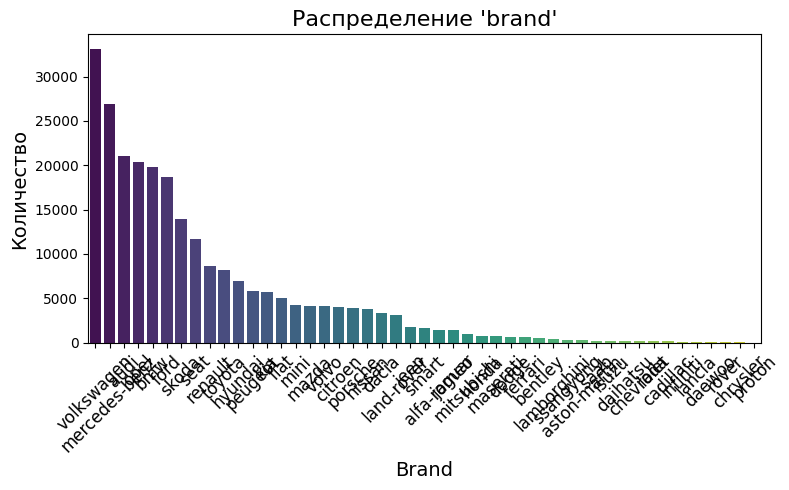

<ipython-input-36-0423f4b385b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


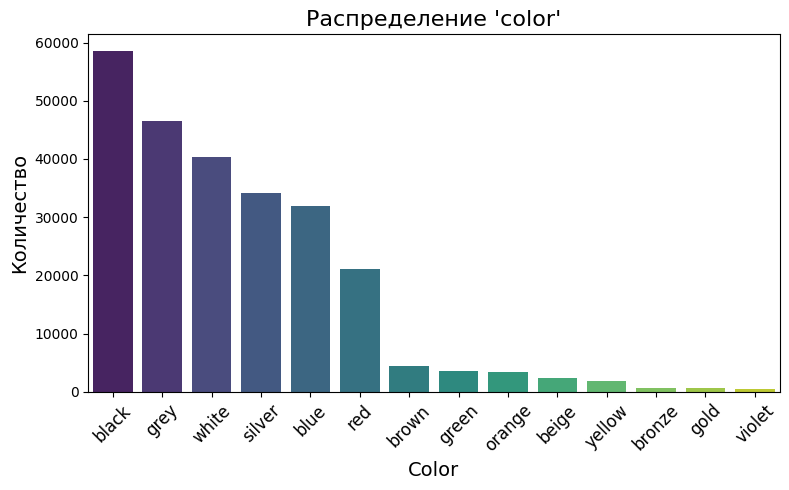

<ipython-input-36-0423f4b385b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


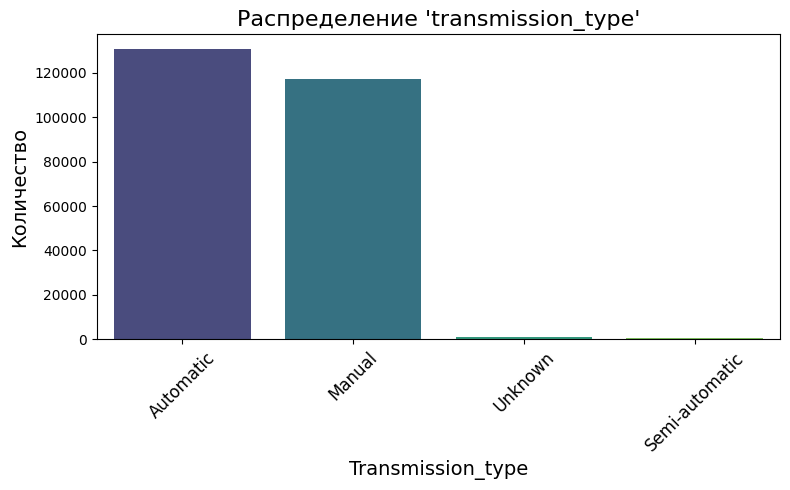

<ipython-input-36-0423f4b385b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


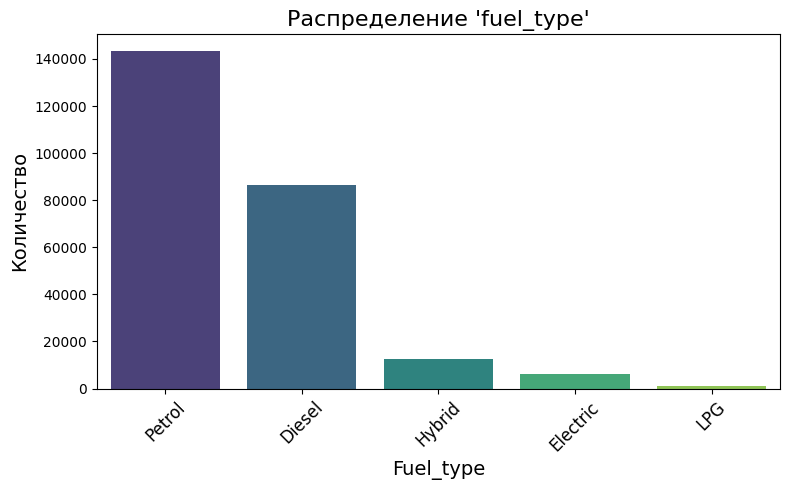

In [ ]:
df_category_for_visualization = ["brand", "color", "transmission_type", "fuel_type"]
for col in df_category_for_visualization:
    plt.figure(figsize=[8, 5])  # Размер графика
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Распределение '{col}'", fontsize=16)  # Заголовок
    plt.xlabel(col.capitalize(), fontsize=14)  # Подпись оси X
    plt.ylabel("Количество", fontsize=14)  # Подпись оси Y
    plt.xticks(rotation=45, fontsize=12)  # Поворот меток оси X для удобства
    plt.tight_layout()  # Корректное отображение графика
    plt.show()

**Для столбцов, содержащий непрерывные данные, рассчитаем базовые статистики**

In [ ]:
df_num_cols = ["year", "price_in_euro", "power_kw", "power_ps", "fuel_consumption_l_100km", "fuel_consumption_g_km","mileage_in_km"]
describe_df = df[df_num_cols].describe()
print("Базовые статистики для непрерывных данных:\n")
print(describe_df.round(2))
print("\n")
print("Медиана:\n", df[df_num_cols].median())
print("\n")
print("Мода:\n", df[df_num_cols].mode())
print("\n")

Базовые статистики для непрерывных данных:

            year  price_in_euro   power_kw   power_ps  \
count  249530.00      249530.00  249417.00  249417.00   
mean     2016.25       26112.95     126.24     171.72   
std         5.47       37021.75      72.08      97.97   
min      1995.00         120.00       1.00       1.00   
25%      2013.00       11990.00      82.00     111.00   
50%      2018.00       19890.00     110.00     150.00   
75%      2020.00       29910.00     140.00     190.00   
max      2023.00     5890500.00     735.00     999.00   

       fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  
count                 221360.00              207758.00      249468.00  
mean                       6.09                 140.12       85466.97  
std                        2.58                  53.86       78761.08  
min                        0.00                   0.00           0.00  
25%                        4.90                 116.00       25000.00  
50%       

In [ ]:
max_price_row = df.loc[df['price_in_euro'].idxmax()]
print(max_price_row)

brand                                                            lamborghini
model                                                            Lamborghini
color                                                                   grey
registration_date                                                    08/2018
year                                                                  2018.0
price_in_euro                                                      5890500.0
power_kw                                                               566.0
power_ps                                                               770.0
transmission_type                                                  Automatic
fuel_type                                                             Petrol
fuel_consumption_l_100km                                                16.0
fuel_consumption_g_km                                                  370.0
mileage_in_km                                                           65.0

In [ ]:
max_power_ps = df.loc[df['power_ps'].idxmax()]
print(max_power_ps)

brand                                   ferrari
model                       Ferrari SF90 Spider
color                                      blue
registration_date                       07/2021
year                                     2021.0
price_in_euro                          699980.0
power_kw                                  735.0
power_ps                                  999.0
transmission_type                     Automatic
fuel_type                                Hybrid
fuel_consumption_l_100km                   12.3
fuel_consumption_g_km                     280.0
mileage_in_km                            2332.0
offer_description             *Ferrari-Dresden*
Name: 52421, dtype: object


In [ ]:
#считаем количество выбросов
Q1 = df[df_num_cols].quantile(0.25)
Q3 = df[df_num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[df_num_cols] < lower_bound) | (df[df_num_cols]> upper_bound)).sum()
print("Количество выбросов в каждом столбце:\n", outliers)
print("\n")


Количество выбросов в каждом столбце:
 year                         5698
price_in_euro               15586
power_kw                    19915
power_ps                    20042
fuel_consumption_l_100km    13446
fuel_consumption_g_km       21501
mileage_in_km                5296
dtype: int64




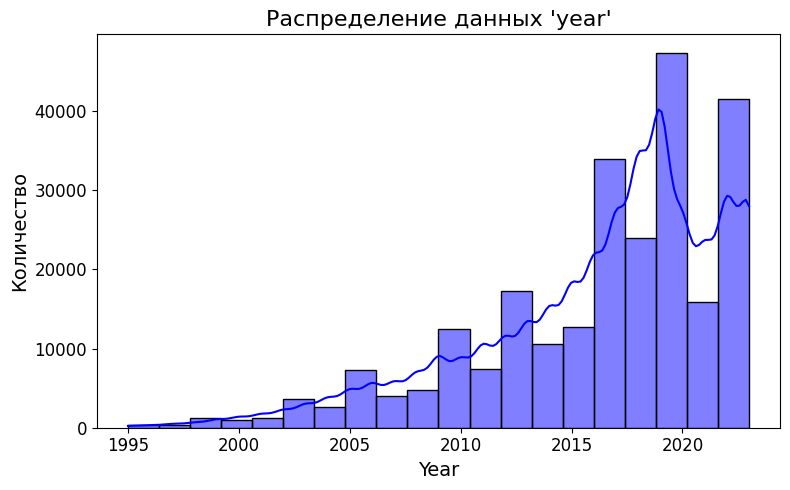

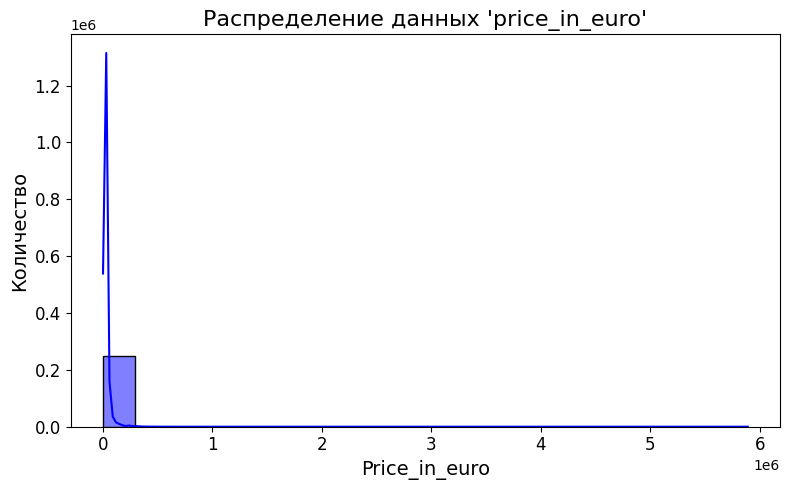

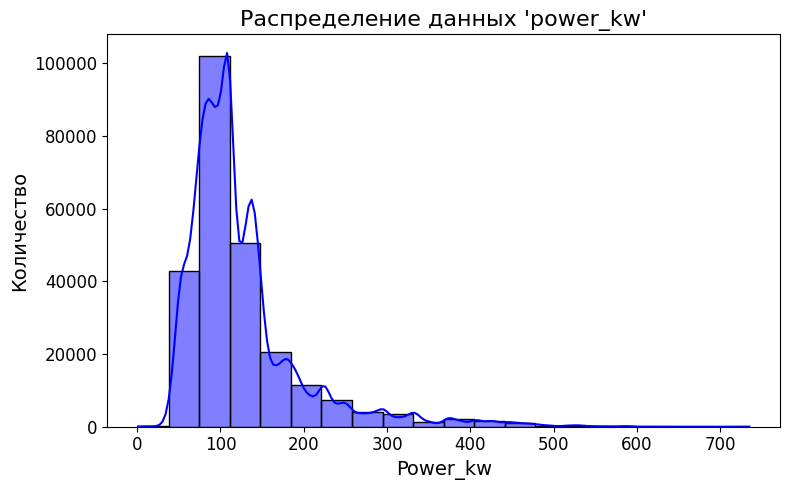

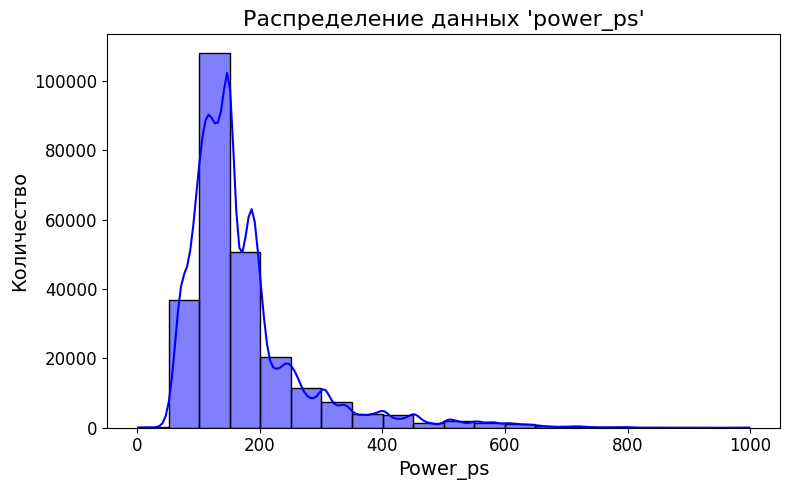

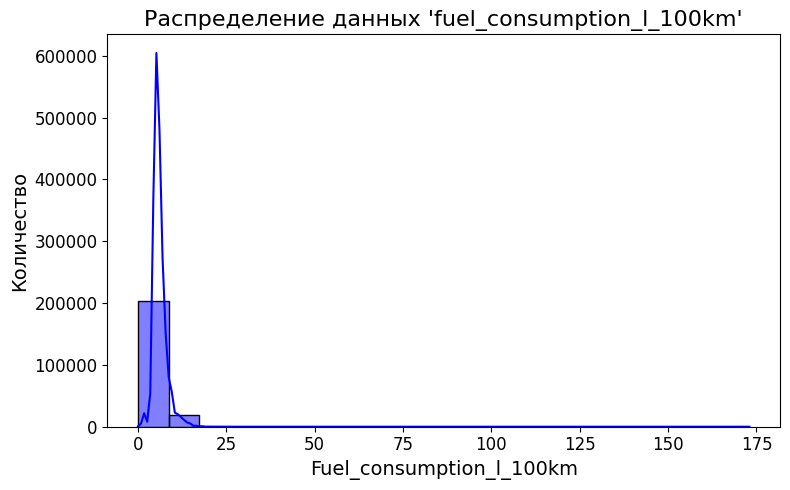

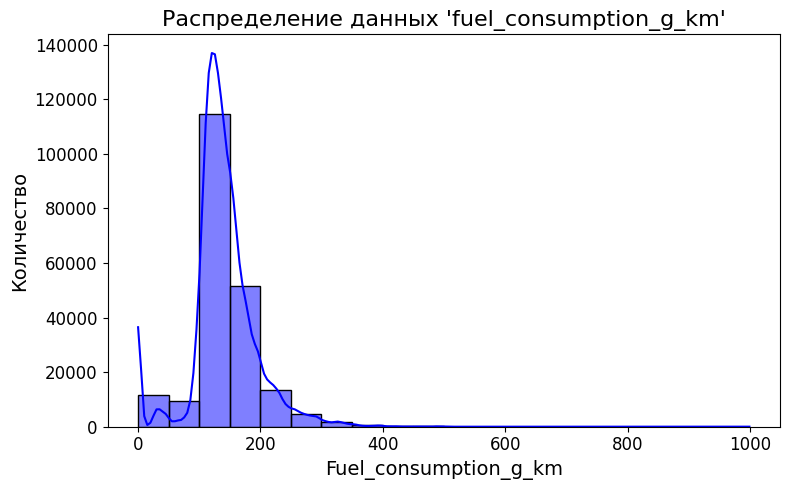

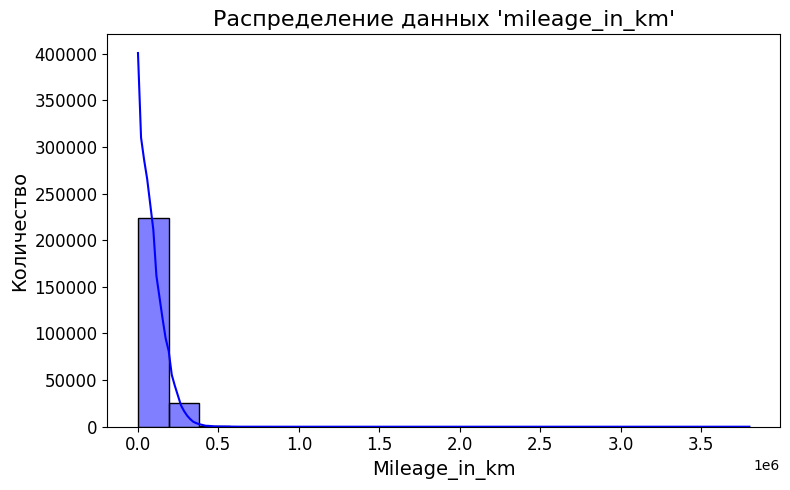

In [ ]:
for col in df_num_cols:
  plt.figure(figsize=[8, 5])  # Размер графика
  sns.histplot(data=df, x=col, bins=20, kde=True, color="blue", edgecolor="black")
  plt.title(f"Распределение данных '{col}'", fontsize=16)
  plt.xlabel(col.capitalize(), fontsize=14)
  plt.ylabel("Количество", fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.tight_layout()  # Удобное расположение графика
  plt.show()

In [ ]:
#убираем выбросы в непрерывных данных
df_middle = df[df_num_cols][~((df[df_num_cols] < lower_bound) | (df[df_num_cols] > upper_bound)).any(axis=1)]
#считаем моду и медиану после очистки данных:
print("Считаем базовые статистики, моду и медиану после очистки данных от выбросов:\n")
df_mode = df_middle.mode()
df_median = df_middle.median()
print(df_middle.describe())
print("\n")
print("Медиана:\n", df_median)
print("\n")
print("Мода:\n", df_mode)
print("\n")

Считаем базовые статистики, моду и медиану после очистки данных от выбросов:

                year  price_in_euro       power_kw       power_ps  \
count  201419.000000  201419.000000  201352.000000  201352.000000   
mean     2016.589522   20060.261654     106.903815     145.435580   
std         4.801736   11143.871068      37.515520      50.976655   
min      2003.000000     149.000000       4.000000       5.000000   
25%      2014.000000   11900.000000      81.000000     110.000000   
50%      2018.000000   18600.000000     103.000000     140.000000   
75%      2020.000000   26780.000000     131.000000     178.000000   
max      2023.000000   56790.000000     226.000000     307.000000   

       fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  
count             185193.000000          168813.000000  201361.000000  
mean                   5.667388             136.791984   81663.632461  
std                    1.159825              28.051232   66302.864847  
min         

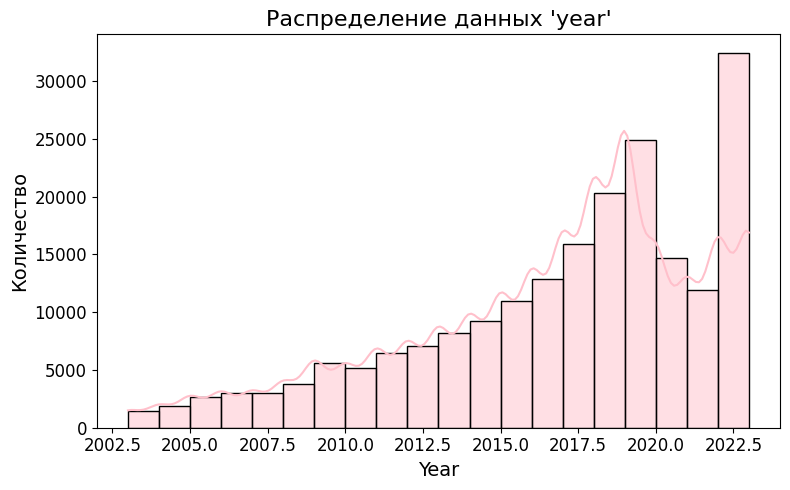

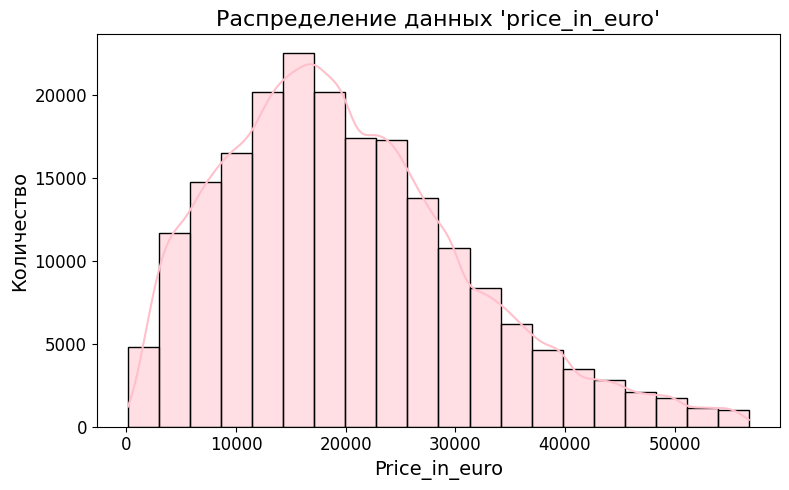

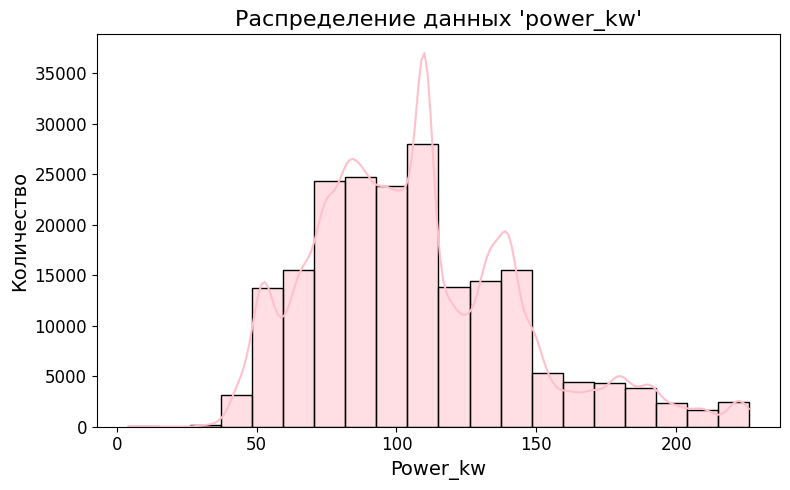

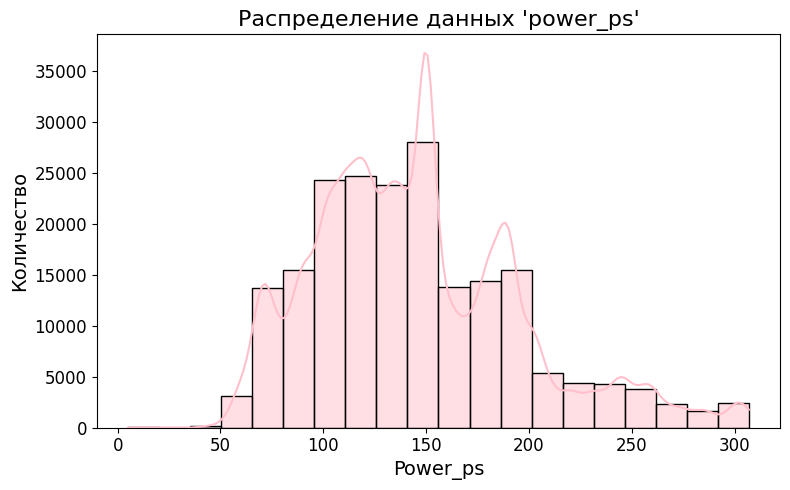

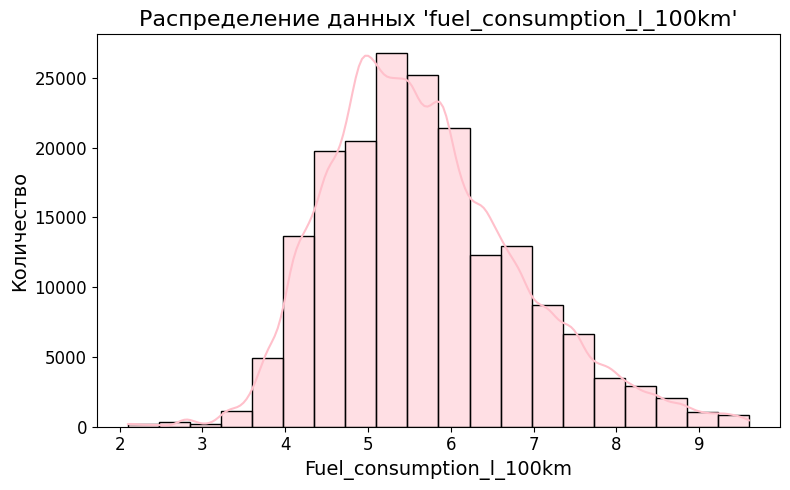

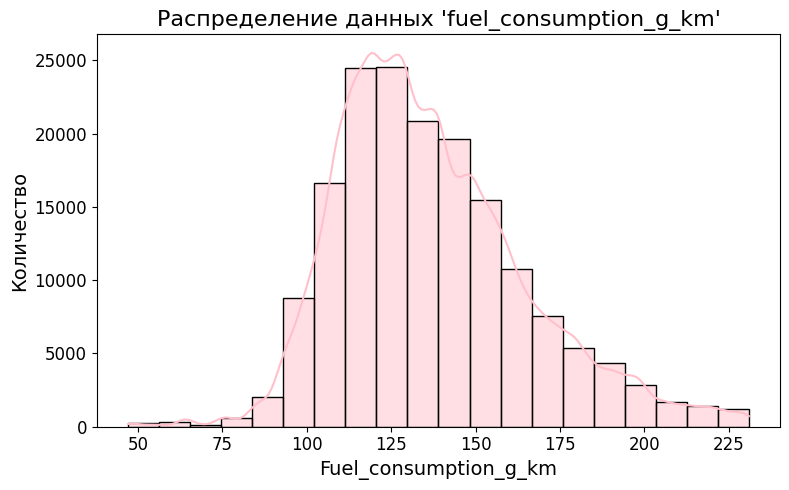

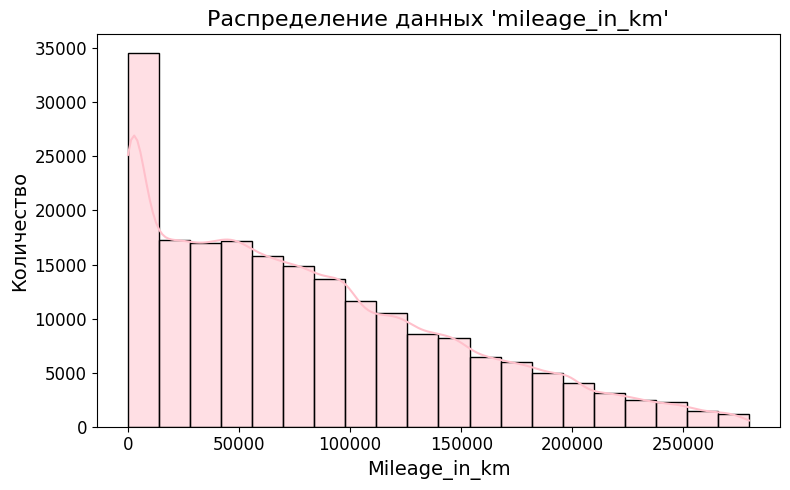

In [ ]:
for col in df_middle:
  plt.figure(figsize=[8, 5])  # Размер графика
  sns.histplot(data=df_middle, x=col, bins=20, kde=True, color="pink", edgecolor="black")
  plt.title(f"Распределение данных '{col}'", fontsize=16)
  plt.xlabel(col.capitalize(), fontsize=14)
  plt.ylabel("Количество", fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.tight_layout()  # Удобное расположение графика
  plt.show()

**Cформулируем и проверим несколько гипотез:**

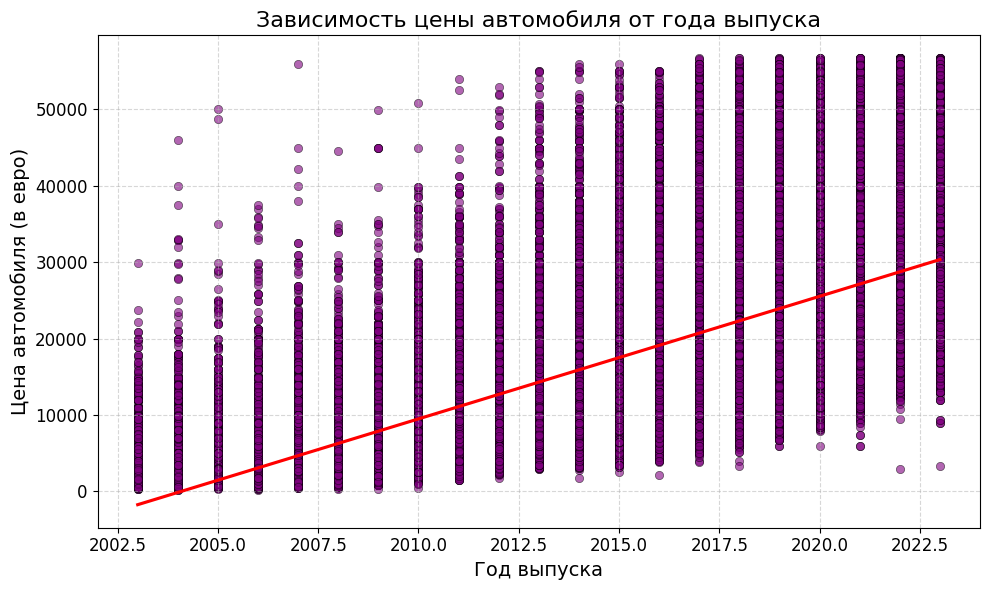

In [ ]:
#После удаления выбросов проверим, есть ли зависимость между ценой автомобиля и годом его выпуска?
# Диаграмма рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_middle, x="year", y="price_in_euro", alpha=0.6, color="purple", edgecolor="black")

# Линия регрессии для проверки тренд
sns.regplot(data=df_middle, x="year", y="price_in_euro", scatter=False, color="red")

# Настройка графика
plt.title("Зависимость цены автомобиля от года выпуска", fontsize=16)
plt.xlabel("Год выпуска", fontsize=14)
plt.ylabel("Цена автомобиля (в евро)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

*Вывод: линия регрессии указывает на то, что зависимость между годом выпуска автомобиля и его ценой есть, чем новее автомобиль, тем он дороже (в расчете не учитывается инфляция)*

In [ ]:
#Проверим, есть ли зависимость между расходом топлива и мощностью двигателя

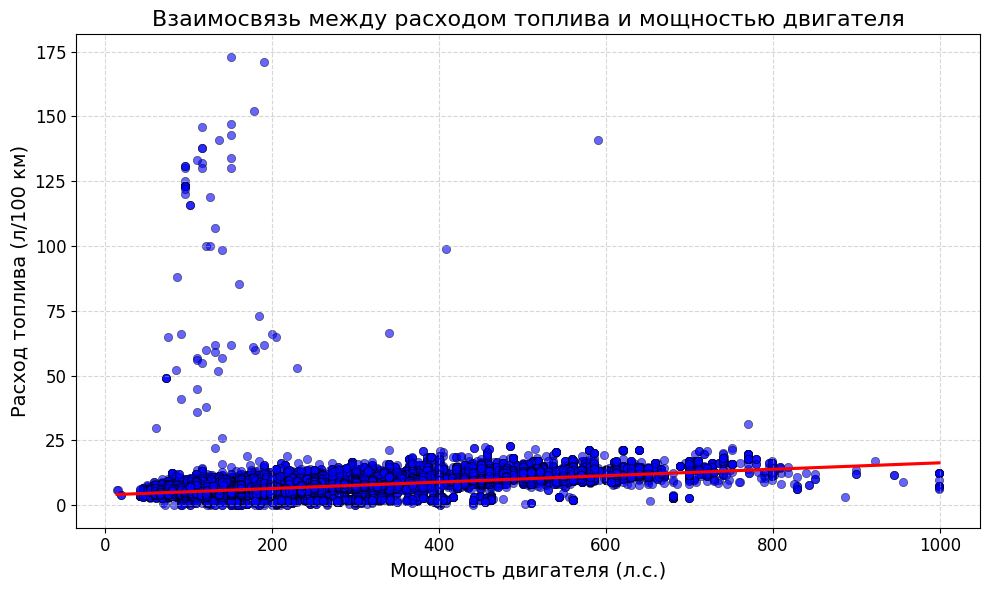

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="power_ps", y="fuel_consumption_l_100km", alpha=0.6, color="blue", edgecolor="black")

# Линия регрессии для оценки тренда
sns.regplot(data=df, x="power_ps", y="fuel_consumption_l_100km", scatter=False, color="red")

# Настройка графика
plt.title("Взаимосвязь между расходом топлива и мощностью двигателя", fontsize=16)
plt.xlabel("Мощность двигателя (л.с.)", fontsize=14)
plt.ylabel("Расход топлива (л/100 км)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Вывод: линия регресии указывает на преимущественное наличие взаимосвязи между мощностью двигателя и расходом топлива на 100км

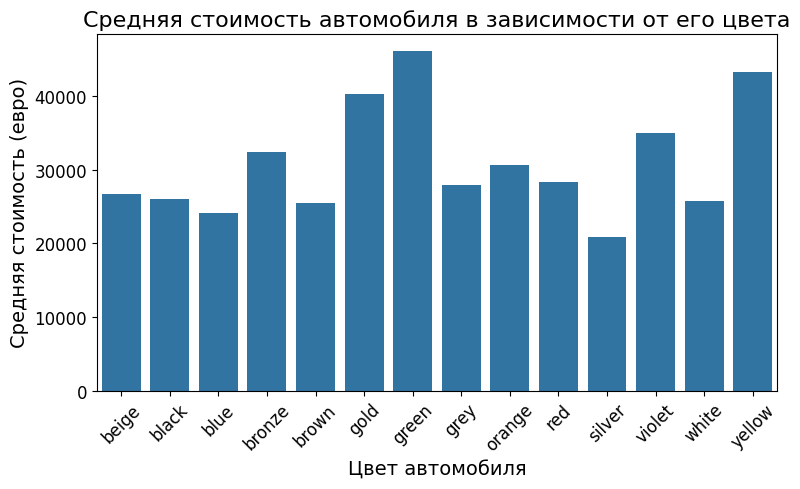

In [ ]:
#Проверим, есть ли взаимосвязь между стоимостью автомобиля и его цветом
avg_price_per_color = df.groupby("color")["price_in_euro"].mean().reset_index()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_per_color, x="color", y="price_in_euro")
plt.title("Средняя стоимость автомобиля в зависимости от его цвета", fontsize=16)
plt.xlabel("Цвет автомобиля", fontsize=14)
plt.ylabel("Средняя стоимость (евро)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Вывод: Зеленые и желтые автомобили существенно дороже, чем их серые собратья

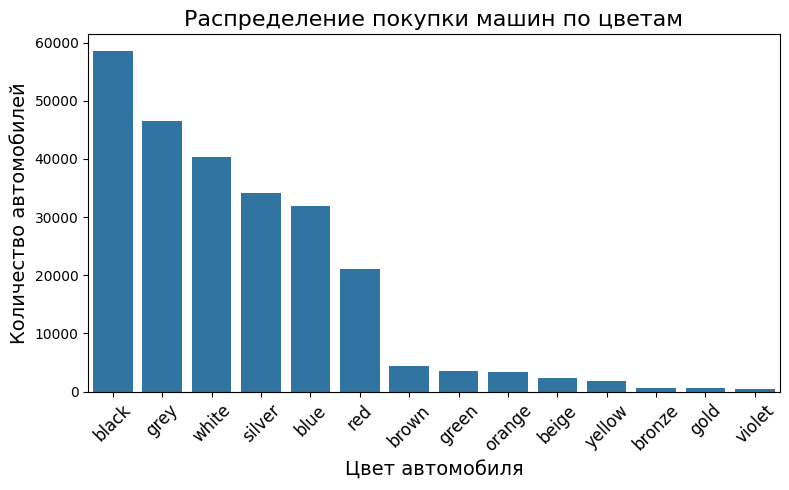

In [ ]:
#И, наконец, проверим, правда ли, что чаще всего покупают черные машины?
# Подсчет количества машин каждого цвета
color_counts = df["color"].value_counts().reset_index()
color_counts.columns = ["color", "count"]

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(data=color_counts, x="color", y="count")
plt.title("Распределение покупки машин по цветам", fontsize=16)
plt.xlabel("Цвет автомобиля", fontsize=14)
plt.ylabel("Количество автомобилей", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

Вывод: действительно, чаще всего покупатели выбирали черные авто